In [1]:
# Python pakage for numerical processing
#Tech homework 1: also at https://github.com/Bruce1809/POS6729Spr21 
#First, we need to tell python that we want to import specific packages (bits of code) that allow us then to perform specific operations
#Networkx is used for network analysis
import networkx as nx 
# Data Visualisation library in Python
import matplotlib.pyplot as plt
# Python pakage for numerical processing
import numpy as np
import pandas as pd
import collections
# Python package to change directory
import os
#change the directory to where you have the files you will need to use
os.chdir('/Users/brucemiller/Google Drive/UCF Courses/POS6729-Political Network Analysis/JupyterNotebooks')


In [2]:
print(os.getcwd())

/Users/brucemiller/Google Drive/UCF Courses/POS6729-Political Network Analysis/JupyterNotebooks


In [3]:
wfile1 = 'conflict.csv'
wfile2 = 'collaboration'

In [4]:
wfile1


'conflict.csv'

In [5]:
wfile2

'collaboration'

In [6]:
confl = pd.read_csv(wfile1, sep=',',index_col=0)
coop = pd.read_csv(wfile2, sep=' ', header=None)

In [10]:
#look up reindex function
print(confl)
print(coop)


        NGOA1  NGOA2  LAOW1  NGOA3  NGOA4  NGOA5  LAOW2  LAOW3  LAOW4  LAOW5  \
NGOA1       0      1      0      0      1      1      0      0      0      1   
NGOA2       0      0      1      0      0      1      0      0      0      0   
LAOW1       0      0      0      0      0      0      0      0      0      0   
NGOA3       0      0      0      0      0      0      0      0      0      0   
NGOA4       0      0      0      0      0      0      0      0      0      0   
NGOA5       1      1      0      0      0      0      0      0      0      0   
LAOW2       0      0      0      0      0      0      0      0      0      0   
LAOW3       0      0      0      0      0      0      0      0      0      0   
LAOW4       0      0      0      0      0      0      0      0      0      0   
LAOW5       0      0      0      0      0      0      0      0      0      0   
LAOW6       0      0      0      0      0      0      0      0      0      0   
GOVA1       0      0      0      0      

In [8]:
coop.columns=['node1','node2','edge']

In [11]:

coopx= nx.from_pandas_edgelist(coop,'node1', 'node2',edge_attr = 'edge') 

In [16]:
conflx = nx.from_pandas_adjacency(confl)
conflx.name = "Conflict Graph from adjacency matrix"
print(nx.info(conflx))

Name: Conflict Graph from adjacency matrix
Type: Graph
Number of nodes: 38
Number of edges: 27
Average degree:   1.4211


In [17]:
coopx.name = "Collaboration Graph"
print(nx.info(coopx))

Name: Collaboration Graph
Type: Graph
Number of nodes: 38
Number of edges: 287
Average degree:  15.1053


In [18]:
nx.average_shortest_path_length(coopx)

1.5945945945945945

In [19]:
for C in (conflx.subgraph(c).copy() for c in nx.connected_components(conflx)):
    print(nx.average_shortest_path_length(C))

2.5672514619883042
0
0
1.3333333333333333
0
0
0
0
0
0
0
0
0
0
0
0
0
0


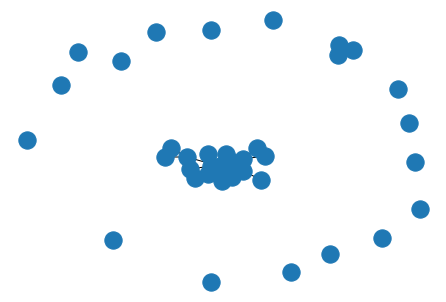

In [22]:

nx.draw(conflx)

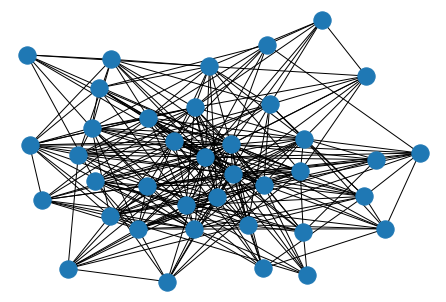

In [23]:
nx.draw(coopx)

1. By running a few basic metrics, we can see why the conflict data has many conflicts; it has a much lower average degree: 1.42 vs. 15.1 for the collaboration data.  Another metric, the average shortest path length which shows the number of nodes to go through to communicate is also quite different:  1.6 in collaboration data vs. 2.5 and 1.3; and when we graph above, we see that the conflict network has many disconnected nodes (which required some manipulation to run shortest average path length).  Next, if time permits, we look at degree distribution.


[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

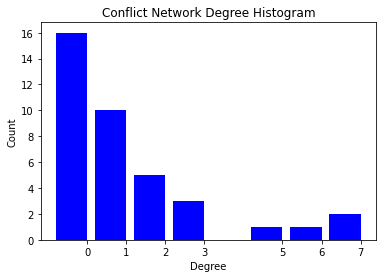

In [27]:
G = conflx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Conflict Network Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

[Text(0, 0, '34'),
 Text(0, 0, '32'),
 Text(0, 0, '28'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7')]

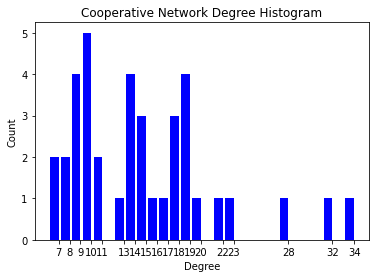

In [28]:
G = coopx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Cooperative Network Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

2. As an additional analysis, the degree distribution is markedly different; in the conflict network, there is no node with more than 7 connections and it is clear that most nodes have 0 or 1 edge.  In the collaboration network, it is clear the group is better connected (although sometimes this may distract collaboration, creativity and innovation).  In the collaboration dataset, the *minimum* degree is 7 vs. the maximum degree being 7 in the conflict network.  

In [30]:
print('Average clustering coefficient= ', nx.average_clustering(coopx))
print('Global Efficiency= ', nx.global_efficiency(coopx))
print('Average shortest path length= ',nx.average_shortest_path_length(coopx))
print('Link density= ',nx.density(coopx))
print('Degree assortativity coefficient= ',nx.degree_assortativity_coefficient(coopx))

Average clustering coefficient=  0.6038440913707301
Global Efficiency=  0.7031768610715979
Average shortest path length=  1.5945945945945945
Link density=  0.40825035561877665
Degree assortativity coefficient=  -0.19299389374925752


In [32]:
print('Average clustering coefficient= ', nx.average_clustering(conflx))
print('Global Efficiency= ', nx.global_efficiency(conflx))
#print('Average shortest path length= ',nx.average_shortest_path_length(conflx))
print('Link density= ',nx.density(conflx))
print('Degree assortativity coefficient= ',nx.degree_assortativity_coefficient(conflx))

Average clustering coefficient=  0.06679197994987468
Global Efficiency=  0.11849217638691327
Link density=  0.03840682788051209
Degree assortativity coefficient=  -0.38095238095238176


3. Additional metrics are very interesting comparatively as global efficiency for the cooperative network is .7 vs. .11 for the conflict network.  Also, average clustering coefficient is almost 10 times greater (.60 vs. .067) meaning many more members of cooper have friends have the same friend.  Finally, link density had a large difference .41 vs. .038; again, a 10X difference.  